In [1]:
import pandas as pd
df= pd.read_csv('data_collected_google_bing.csv')

In [2]:
df.head()

,Query,Engine,Title,Content,Date
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s...",2024-06-05
1,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,"Today, the Environmental Justice Foundation c...",2024-05-24
2,Vessel caught misreporting catch amount,Google,"N.S. boat captain, 2 companies fined $125K for...","A boat captain from Sambro, N.S., with a hist...",2023-09-13
3,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,NaN,2023-10-31
4,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Early this morning, the Fremantle Highway, a ...",2023-07-26


In [3]:
# Find unique sources
unique_sources = df['Title'].nunique()
print("Unique sources by search engine:", df.groupby('Engine')['Title'].nunique())

Unique sources by search engine: Engine
Bing      59
Google    77
Name: Title, dtype: int64


In [4]:
df["Content"].isna().sum()

28

In [5]:
141-117, # 24 repeated content, 28 NaN

(24,)

In [6]:
df.describe()

,Query,Engine,Title,Content,Date
count,169,169,169,141,169
unique,10,2,136,117,117
top,Vessel caught with incorrect catch reports,Google,Two vessels catch fire after missile strikes o...,©2024 iStockphoto LP. The iStock design is a ...,10 days ago
freq,20,86,7,4,13


In [7]:

word_groups = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports', 'report','reports','reported','unreporting', 'underreport','underreporting','underreported','underreports', 'misreport','misreports','misreported','misreporting', 'nonreport','nonreporting','nonreported','nonreports' ],
    ['underreport', 'underreports', 'underreported', 'underreporting'],
    ['undocumented', 'undocument', 'undocumenting', 'undocuments'],
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports'],
    ['evade', 'evading','evaded','evades' ], 
    ['detect', 'detecting','detected','detects' ],
    ['appear', 'appearing','appeared','appears' ],
    ['reappear', 'reappeared','reappearing','reappears' ],
    ['disappear', 'disappearing','adisppeared','disappears' ],
    ['reveal','revealing','revealed','reveales'],
    ['undisclosed', 'undisclose', 'undiscloses', 'undisclosing'],
    ['disclose', 'disclosing','discloses', 'disclosed'],
    ['banned', 'banning', 'ban', 'bans'],
    ['discover', 'discovers'],
    ['endanger'],
    ['unrecorded', 'unrecord', 'unrecords', 'unrecording'],
    ['record', 'recording', 'recorded', 'records', 'non-record', 'non-records', 'non-recording'],
    ['hiding', 'hide','hidden','hides'],
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    ['logbook', 'logged'],
    ['declaration', 'declare', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration'],
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates'],
    ['fraud', 'fraudulence', 'hoax'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming', 'trade'], 
    ['ocean', 'sea', 'seas'],
    ['port'],
    ['transshipment'],
    ['landing'],
    ['selective'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates'],
    ['alter', 'altering', 'alters'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

In [8]:
len(word_groups)

38

### What's wrong here (first code) & need clarification for the secode function

In [9]:
import re 

###### clean_word is with a subroutine of rep_word_text, dealing with one group of words
def clean_word(text, group):
    if len(group) == 1:
        return text
    elif len(group) != 1:
        updated_text = text
        #return 2
        for i in range(1,len(group)):
            pattern = r'\b{}\b'.format(re.escape(group[i]))
            updated_text = re.sub(pattern, group[0], updated_text)
        return updated_text
    else:
        print("The word group is empty")
        return None

##### Here word_group_list is the list of word groups.
def rep_word_text(text, word_group_list):
    if len(word_group_list) != 0:
        new_text = text
        for i in range(len(word_group_list)):
            new_text = clean_word(new_text, word_group_list[i])
        return new_text
    else:
        print("the word group list is invalid")
        return None

### CHat GPT Code

In [103]:
import re

def clean_word(text, group):
    # Return the original text if the group has only one word or is empty
    if len(group) <= 1:
        return text

    updated_text = text
    for i in range(1, len(group)):  # Start from index 1
        pattern = r'\b{}\b'.format(re.escape(group[i]))
        updated_text = re.sub(pattern, group[0], updated_text)

    return updated_text

# List of word groups
groups = [
    ['unreport', 'unreported', 'unreporting', 'unreports', 'report','reports','reported','underreport','underreporting','underreported','underreports', 'misreport','misreports','misreported','misreporting', 'non-report','non-reporting','non-reported','non-reports'],
    ['underreport', 'underreports', 'underreported', 'underreporting'],
    ['undocumented', 'undocument', 'undocumenting', 'undocuments'],
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports'],
    ['evade', 'evading','evaded','evades'], 
    ['detect', 'detecting','detected','detects'],
    ['appear', 'appearing','appeared','appears'],
    ['reappear', 'reappeared','reappearing','reappears'],
    ['disappear', 'disappearing','disappeared','disappears'],
    ['reveal','revealing','revealed','reveals'],
    ['undisclosed', 'undisclose', 'undiscloses', 'undisclosing'],
    ['disclose', 'disclosing','discloses', 'disclosed'],
    ['banned', 'banning', 'ban', 'bans'],
    ['discover', 'discovers'],
    ['endanger']
]

# Text to clean
checking_text = "Here we want & to -reporting the fishing crime in the water?"

# Clean the text for each group
for group in groups:
    checking_text = clean_word(checking_text, group)

print(checking_text)


Here we want & to -reporting the fishing crime in the water?


In [27]:
keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]
keywords[:6]

['unreport',
 'underreport',
 'undocumented',
 'misrepresent',
 'register',
 'logbook']

In [50]:
len(keywords)

24

In [26]:
df = df.fillna('no content')
df.head()

,Query,Engine,Title,Content,Date,rs_title,rs_content_q,rs_content_kw
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s...",2024-06-05,0.0,0.007233,0.003230
1,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,"Today, the Environmental Justice Foundation c...",2024-05-24,0.0,0.019755,0.005909
2,Vessel caught misreporting catch amount,Google,"N.S. boat captain, 2 companies fined $125K for...","A boat captain from Sambro, N.S., with a hist...",2023-09-13,0.0,0.020957,0.000367
3,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,no content,2023-10-31,0.0,0.000000,0.000000
4,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Early this morning, the Fremantle Highway, a ...",2023-07-26,0.0,0.015843,0.000194


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# make a list of words without repetution
y = vectorizer.get_feature_names_out()

In [20]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [21]:
X.shape

(4, 9)

In [22]:
y

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [23]:
len(y)

9

In [31]:
df['Query']

0      Vessel caught misreporting catch amount
1      Vessel caught misreporting catch amount
2      Vessel caught misreporting catch amount
3      Vessel caught misreporting catch amount
4      Vessel caught misreporting catch amount
                        ...                   
164       Vessel caught bypassing quota system
165       Vessel caught bypassing quota system
166       Vessel caught bypassing quota system
167       Vessel caught bypassing quota system
168       Vessel caught bypassing quota system
Name: Query, Length: 169, dtype: object

In [35]:
X = vectorizer.fit_transform(df['Query'].tolist())
y = vectorizer.get_feature_names_out()

In [37]:
X.shape

(169, 30)

In [38]:
y

array(['amount', 'area', 'atlantic', 'bypassing', 'catch', 'caught',
       'falsifying', 'fish', 'fishing', 'haddock', 'in', 'inaccurate',
       'incorrect', 'logs', 'misreporting', 'near', 'north', 'protected',
       'quantities', 'quota', 'records', 'reports', 'size', 'species',
       'system', 'tuna', 'underreporting', 'unrecorded', 'vessel', 'with'],
      dtype=object)

In [39]:
len(y)

30

In [56]:
y.reshape(1,-1)

array([['amount', 'area', 'atlantic', 'bypassing', 'catch', 'caught',
        'falsifying', 'fish', 'fishing', 'haddock', 'in', 'inaccurate',
        'incorrect', 'logs', 'misreporting', 'near', 'north',
        'protected', 'quantities', 'quota', 'records', 'reports', 'size',
        'species', 'system', 'tuna', 'underreporting', 'unrecorded',
        'vessel', 'with']], dtype=object)

In [58]:
len(y), y.shape

(30, (30,))

In [41]:
query_vectors = vectorizer.transform(df['Query'].tolist())
query_vectors.shape

(169, 30)

In [60]:
query_vectors = vectorizer.transform(df['Query'].tolist())
query_vectors

<169x30 sparse matrix of type '<class 'numpy.float64'>'
	with 1013 stored elements in Compressed Sparse Row format>

In [45]:
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df['Query'].tolist())
query_vectors

<169x30 sparse matrix of type '<class 'numpy.float64'>'
	with 1013 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample vectors
query_vector = np.array([1, 0, 1]).reshape(1, -1)
content_vector = np.array([0, 1, 1]).reshape(1, -1)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(query_vector, content_vector)

# Extract the similarity score
similarity_score = similarity_matrix[0][0]

print("Cosine Similarity:", similarity_score)


Cosine Similarity: 0.4999999999999999


In [61]:
word_groups = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports'],
    ['underreport', 'underreports', 'underreported', 'underreporting'],
    ['undocumented', 'undocument', 'undocumenting', 'undocuments'],
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports'],
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    ['logbook', 'logged'],
    ['declaration', 'declare', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration'],
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates'],
    ['fraud', 'fraudulence', 'hoax'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming'], 
    ['ocean', 'sea', 'seas'],
    ['port'],
    ['transshipment'],
    ['landing'],
    ['selective'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates'],
    ['alter', 'altering', 'alters'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

In [77]:
dh = df['Query'].head()
dh

0    Vessel caught misreporting catch amount
1    Vessel caught misreporting catch amount
2    Vessel caught misreporting catch amount
3    Vessel caught misreporting catch amount
4    Vessel caught misreporting catch amount
Name: Query, dtype: object

In [79]:
dh.tolist()

['Vessel caught misreporting catch amount',
 'Vessel caught misreporting catch amount',
 'Vessel caught misreporting catch amount',
 'Vessel caught misreporting catch amount',
 'Vessel caught misreporting catch amount']

In [83]:
query_vectors = vectorizer.transform(dh.tolist())
print(query_vectors)

  (0, 28)	0.229200305656373
  (0, 14)	0.5143204753311834
  (0, 5)	0.229200305656373
  (0, 4)	0.33531308007923366
  (0, 0)	0.7197041244545798
  (1, 28)	0.229200305656373
  (1, 14)	0.5143204753311834
  (1, 5)	0.229200305656373
  (1, 4)	0.33531308007923366
  (1, 0)	0.7197041244545798
  (2, 28)	0.229200305656373
  (2, 14)	0.5143204753311834
  (2, 5)	0.229200305656373
  (2, 4)	0.33531308007923366
  (2, 0)	0.7197041244545798
  (3, 28)	0.229200305656373
  (3, 14)	0.5143204753311834
  (3, 5)	0.229200305656373
  (3, 4)	0.33531308007923366
  (3, 0)	0.7197041244545798
  (4, 28)	0.229200305656373
  (4, 14)	0.5143204753311834
  (4, 5)	0.229200305656373
  (4, 4)	0.33531308007923366
  (4, 0)	0.7197041244545798


In [87]:
type(query_vectors)

scipy.sparse._csr.csr_matrix

In [84]:
query_vectors.shape

(5, 30)

In [86]:
print(query_vectors[0])
# the second elemet in pair is the place of the word betweeen 30 words we have, words in alphabet orders.

  (0, 28)	0.229200305656373
  (0, 14)	0.5143204753311834
  (0, 5)	0.229200305656373
  (0, 4)	0.33531308007923366
  (0, 0)	0.7197041244545798


In [ ]:
query_vectors = vectorizer.transform(df['Query'].tolist())

In [ ]:
title_vectors = vectorizer.transform(df['Title'].tolist())

In [ ]:
content_vectors = vectorizer.transform(df['Content'].tolist())

In [88]:
cosine_similarity(query_vector, content_vector)

array([[0.00869846]])

In [100]:
quary_text = df['Query'].tolist()

title_text = df['Title'].tolist()

content_text = df['Content'].tolist()

In [102]:
query_vector = query_vectors[4]
query_vector

<1x30 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# Flatten the list of keywords

#keywords = [" ".join(keyword_list) for keyword_list in word_groups]

#[keyword for sublist in word_groups for keyword in sublist]

# Fill None values with an empty string
df = df.fillna('no content')


keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()


# Combine all text data (queries, titles, and content) for consistent vectorization
#all_texts = df['Query'].tolist() + df['Title'].tolist() \
#+ df['Content'].tolist()+ keywords
all_texts = df['Query'].tolist() + df['Title'].tolist() + df['Content'].tolist()+ keywords



for text in all_texts:
    #rep_word_text(text, word_groups)
    text = rep_word_text(text, word_groups)

# Fit the vectorizer on all texts
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df['Query'].tolist())
title_vectors = vectorizer.transform(df['Title'].tolist())
content_vectors = vectorizer.transform(df['Content'].tolist())
keywords_vectors = vectorizer.transform(keywords)



# Calculate cosine similarity
relevance_scores_title = []
relevance_scores_content = []
relevance_scores_keywords = []

num_documents = len(df)
num_keywords = len(keywords)

for i in range(len(df)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    #rs_title = cosine_similarity(query_vector, title_vector)[0][0]
    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_kw = 0
    for j in range(len(keywords)):
        keywords_vector = keywords_vectors[j]
        rs_content_kw += cosine_similarity(keywords_vector, content_vector)[0][0]
        rs_title = cosine_similarity(keywords_vector, title_vector)[0][0]
    rs_content_kw /= len(keywords)  # Average similarity for all keyword groups
    rs_title /= len(keywords)

    relevance_scores_title.append(rs_title)
    relevance_scores_content.append(rs_content_q)
    relevance_scores_keywords.append(rs_content_kw)

# Add relevance scores to the DataFrame
df['rs_title'] = relevance_scores_title
df['rs_content_q'] = relevance_scores_content
df['rs_content_kw'] = relevance_scores_keywords


#df.head(20)

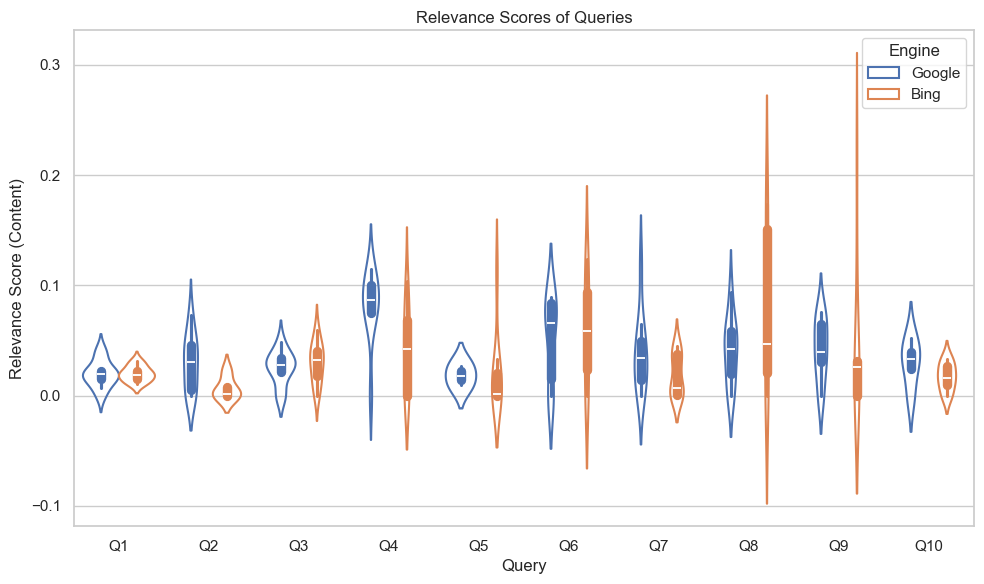

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries
seaborn.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_q", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()


In [122]:
!pip install seaborn

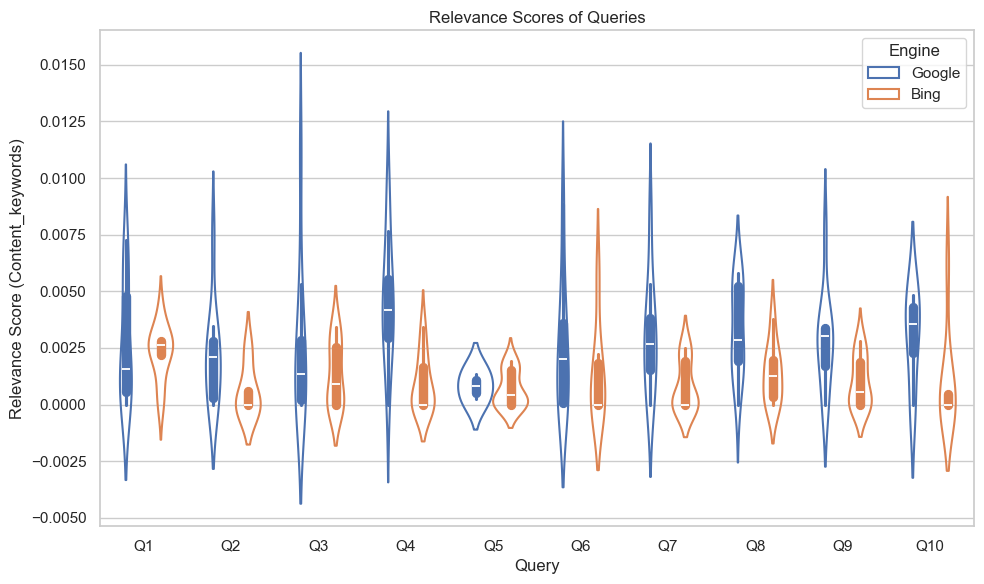

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_kw", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content_keywords)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()


In [157]:
#d1= pd.read_excel('numbers_and_dates.xlsx')
#d1.head(10)

In [156]:
#d2= pd.read_excel('search_results_articles.xlsx')
#d2.head(10)

In [164]:
df3= pd.read_excel('df_content.xlsx')
df3

,Query,Engine,Title,Dates,Link,Content
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,2 weeks ago,https://www.seashepherdglobal.org/latest-news/...,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s..."
1,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,"Oct 31, 2023",https://www.usni.org/magazines/proceedings/202...,Drifting among the ice fields of the Bering S...
2,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,1 month ago,https://ejfoundation.org/news-media/new-rules-...,"Today, the Environmental Justice Foundation c..."
3,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Jul 26, 2023",https://electrek.co/2023/07/26/surprise-media-...,"Early this morning, the Fremantle Highway, a ..."
4,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Mar 25, 2024",https://www.seashepherdglobal.org/latest-news/...,"Monday, 25 Mar, 2024 In a decisive strike aga..."
...,...,...,...,...,...,...
290,Vessel caught with incorrect catch reports,Yahoo,Conservationists say Santa Rosa Commission got...,11 months ago,https://r.search.yahoo.com/_ylt=AwrjZS44F3Zm8N...,NaN
291,Vessel caught with incorrect catch reports,Yahoo,"To Contain China, the U.S. Bets on a 40-Year-O...",3 months ago,https://r.search.yahoo.com/_ylt=AwrjZS44F3Zm8N...,NaN
292,Vessel caught with incorrect catch reports,Yahoo,Hurricane Ian’s catastrophic toll includes at ...,2 years ago,https://r.search.yahoo.com/_ylt=AwrjZS44F3Zm8N...,NaN
293,Vessel caught with incorrect catch reports,Yahoo,More yacht buyers say they paid big money but ...,1 year ago,https://r.search.yahoo.com/_ylt=AwrjZS44F3Zm8N...,NaN


In [217]:
word_groups2 = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports',
         'report','reports', 'reported', 'reporting',
         'misreport', 'misreports', 'misreported', 'misreporting',
         'nonreport', 'nonreports', 'nonreported', 'nonreporting' ,
        'non-report', 'non-reports', 'non-reporting', 'non-reported', 'non-reportable',
         'non report', 'non reports', 'non reporting' , 'non reported',
        'underreport', 'underreports', 'underreported', 'underreporting'],
    
    ['unrecord', 'unrecords', 'unrecorded', 'unrecording', 
         'record', 'records', 'recorded', 'recording', 'recordable',
         'non-record', 'non-records', 'non-recording', 'non-recorded', 'non-recordable'],
    
    ['undocument','undocumented', 'undocumenting', 'undocuments'],
    
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports', 'represent',
           'represents', 'represented', 'representing' ],
    
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    
    ['log','logbook', 'logged','logs'],
    
    ['declare', 'declaration', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration', 'undeclare', 'undeclares', 'undeclared', 'undeclareing' ],
    
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    
    ['evade', 'evades', 'evading', 'evaded'],
    ['disappear', 'disappears', 'disappeared', 'disappearing', 'appear', 'appears', 'appeared','appearing','reappear', 'reappears', 'reappeared', 'reappearing' ],
    
    ['reveal','reveals', 'revealed', 'revealing', 'discover','discovers', 'discovered', 'discovering', 'vanish', 'vanishs', 'vanished', 'vanishing' ],
    ['endanger','endangers', 'endangered', 'endangering', 'protect', 'protects', 'protected', 'protecting', 'restrict', 'restricts', 'restricted', 'restricting'],
    ['undisclose', 'undiscloses', 'undisclosing', 'undisclosed', 'disclose', 'discloses', 'disclosing', 'disclosed' ],
    ['ban','banned', 'banns', 'banning', 'restrict', 'restricts', 'restricted', 'restricting'],
    ['hide','hidden', 'hides', 'hiding'],
    ['bypass', 'bypasses', 'bypassing', 'bypassed'],
    ['load', 'loaded', 'loads', 'loading', 'loaded','offloads','offloading', 'offloaded','offload', 'overload', 'overloads', 'overloaded' ,'overloading' ],
    ['vessel', 'ship', 'trawler', 'trawl', 'grid', 'protocol', 'device', 'devices', 'area', 'zone', 'boat', 'oceana','oceanic'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates', 'manipulating', 'manipulation'],
    ['fraud', 'fraudulence', 'hoax', 'illegal', 'inaccourate', 'fish', 'fishery', 'fisheries', 'fishing','news', 'marine'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming', 'fine'], 
    ['ocean', 'sea', 'seas', 'water', 'navy', 'army', 'waters'],
    ['port', 'import', 'export', 'ports', 'imports', 'exports', 'imported', 'exported', 'importing', 'exporting'],
    ['transshipment'],
    ['landing', 'trade'],
    ['selective', 'caught', 'catch', 'amount', 'by-catch','confiscate','transshipment','law','lawful'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates', 'unregulate', 'unregulating', 'unregulates', 'unregulated'],
    ['alter', 'altering', 'alters', 'altered'],
    ['threaten', 'threatend', 'threatens', 'threatening'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['detect', 'detecting', 'detected', 'detects', 'prosecute', 'prosecutes', 'prosecuted', 'prosecuting'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

In [162]:
keywords2 = ["".join(keyword_list[0]) for keyword_list in word_groups2]
keywords2, len(keywords2)

(['unreport',
  'unrecord',
  'undocument',
  'misrepresent',
  'register',
  'log',
  'declare',
  'label',
  'evade',
  'disappear',
  'reveal',
  'endanger',
  'undisclose',
  'ban',
  'hide',
  'bypass',
  'load',
  'vessel',
  'false',
  'fraud',
  'volume',
  'catch',
  'farmed',
  'ocean',
  'port',
  'transshipment',
  'landing',
  'selective',
  'offend',
  'regulation',
  'alter',
  'threaten',
  'exploit',
  'impose',
  'detect',
  'inspector'],
 36)

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk 
from nltk.corpus import wordnet 
import re
from nltk.stem import WordNetLemmatizer
from lemminflect import getInflection, getAllInflections


# Flatten the list of keywords

#keywords = [" ".join(keyword_list) for keyword_list in word_groups]

#[keyword for sublist in word_groups for keyword in sublist]

# Fill None values with an empty string
df3 = df3.fillna('no content')


keywords2 = ["".join(keyword_list[0]) for keyword_list in word_groups2]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()


# Combine all text data (queries, titles, and content) for consistent vectorization
#all_texts = df['Query'].tolist() + df['Title'].tolist() \
#+ df['Content'].tolist()+ keywords
all_texts = df3['Query'].tolist() + df3['Title'].tolist() + df3['Content'].tolist()+ keywords2



for text in all_texts:
    #rep_word_text(text, word_groups)
    text = rep_word_text(text, word_groups2)

# Fit the vectorizer on all texts
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df3['Query'].tolist())
title_vectors = vectorizer.transform(df3['Title'].tolist())
content_vectors = vectorizer.transform(df3['Content'].tolist())
keywords_vectors = vectorizer.transform(keywords2)



# Calculate cosine similarity
relevance_scores_title = []
relevance_scores_content = []
relevance_scores_keywords = []

num_documents = len(df3)
num_keywords = len(keywords2)

for i in range(len(df3)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    #rs_title = cosine_similarity(query_vector, title_vector)[0][0]
    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_kw = 0
    for j in range(len(keywords2)):
        keywords_vector = keywords_vectors[j]
        rs_content_kw += cosine_similarity(keywords_vector, content_vector)[0][0]
        rs_title = cosine_similarity(keywords_vector, title_vector)[0][0]
    rs_content_kw /= len(keywords2)  # Average similarity for all keyword groups
    rs_title /= len(keywords2)

    relevance_scores_title.append(rs_title)
    relevance_scores_content.append(rs_content_q)
    relevance_scores_keywords.append(rs_content_kw)

# Add relevance scores to the DataFrame
df3['rs_title'] = relevance_scores_title
df3['rs_content_q'] = relevance_scores_content
df3['rs_content_kw'] = relevance_scores_keywords


#df3.head(20)

### I want to create new function for similarity

In [174]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hivagheisari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
#df3["Query"].iloc[0], df3["Query"].iloc[len(df3)-1]

In [193]:
e= df3["Query"].nunique()
e

10

In [198]:
import numpy as np

array = np.arange(0, 294, 10)
for i in array:
    s= df3["Query"].iloc[i]
    #print(s)

In [209]:
sen= ['Vessel caught misreporting catch amount', 'Vessel caught falsifying fishing logs', 'Vessel caught with incorrect catch reports',
    'Vessel caught underreporting catch in North Atlantic', 'Vessel caught misreporting haddock catch', 
     'Vessel caught with inaccurate fish size records', 'Vessel caught underreporting catch near protected area',
    'Vessel caught misreporting tuna catch quantities', 'Vessel caught with unrecorded fish species', 
    'Vessel caught bypassing quota system']
sen[0], len(sen), sen[9]

('Vessel caught misreporting catch amount',
 10,
 'Vessel caught bypassing quota system')

In [216]:
import nltk

from nltk.tokenize import word_tokenize

sentence = sen
#i=0
words=[]
for j in range(len(sen)):
    sent = sen[j]
    word = word_tokenize(sent)
    #words= words+ word
    print(word)

['Vessel', 'caught', 'misreporting', 'catch', 'amount']
['Vessel', 'caught', 'falsifying', 'fishing', 'logs']
['Vessel', 'caught', 'with', 'incorrect', 'catch', 'reports']
['Vessel', 'caught', 'underreporting', 'catch', 'in', 'North', 'Atlantic']
['Vessel', 'caught', 'misreporting', 'haddock', 'catch']
['Vessel', 'caught', 'with', 'inaccurate', 'fish', 'size', 'records']
['Vessel', 'caught', 'underreporting', 'catch', 'near', 'protected', 'area']
['Vessel', 'caught', 'misreporting', 'tuna', 'catch', 'quantities']
['Vessel', 'caught', 'with', 'unrecorded', 'fish', 'species']
['Vessel', 'caught', 'bypassing', 'quota', 'system']


In [238]:
a= [['Vessel', 'caught', 'misreporting', 'catch', 'amount', 'falsifying', 'fishing', 'logs','reports', 'haddock', 'inaccurate', 'fish',
     'size', 'records','underreporting', 'protected', 'area','tuna', 'quantities', 'unrecorded', 'species', 'bypassing', 'quota', 'system']]

In [ ]:
NN, NNS, NNP, NNPS, JJ, PRP, VB, VBP, VBZ, VBD, VBN, VBG

In [236]:
b=[['e']]
s=[['w']]
b+s

[['e'], ['w']]

In [244]:
#word_groups2+a

In [247]:
word_groups3 = [
    # About documents
    'unreport', 'unreported', 'unreporting', 'unreports',
         'report','reports', 'reported', 'reporting',
         'misreport', 'misreports', 'misreported', 'misreporting',
         'nonreport', 'nonreports', 'nonreported', 'nonreporting' ,
        'non-report', 'non-reports', 'non-reporting', 'non-reported', 'non-reportable',
         'non report', 'non reports', 'non reporting' , 'non reported',
        'underreport', 'underreports', 'underreported', 'underreporting',
    
    'unrecord', 'unrecords', 'unrecorded', 'unrecording', 
         'record', 'records', 'recorded', 'recording', 'recordable',
         'non-record', 'non-records', 'non-recording', 'non-recorded', 'non-recordable',
    
    'undocument','undocumented', 'undocumenting', 'undocuments',
    
    'misrepresent', 'misrepresented', 'misrepresenting', 'misreports', 'represent',
           'represents', 'represented', 'representing' ,
    
    'register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering',
    
    'log','logbook', 'logged','logs',
    
    'declare', 'declaration', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration', 'undeclare', 'undeclares', 'undeclared', 'undeclareing' ,
    
    'label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables',
    
    'evade', 'evades', 'evading', 'evaded',
    'disappear', 'disappears', 'disappeared', 'disappearing', 'appear', 'appears', 'appeared','appearing','reappear', 'reappears', 'reappeared', 'reappearing' ,
    
    'reveal','reveals', 'revealed', 'revealing', 'discover','discovers', 'discovered', 'discovering', 'vanish', 'vanishs', 'vanished', 'vanishing' ,
    'endanger','endangers', 'endangered', 'endangering', 'protect', 'protects', 'protected', 'protecting', 'restrict', 'restricts', 'restricted', 'restricting',
    'undisclose', 'undiscloses', 'undisclosing', 'undisclosed', 'disclose', 'discloses', 'disclosing', 'disclosed' ,
    'ban','banned', 'banns', 'banning', 'restrict', 'restricts', 'restricted', 'restricting',
    'hide','hidden', 'hides', 'hiding',
    'bypass', 'bypasses', 'bypassing', 'bypassed',
    'load', 'loaded', 'loads', 'loading', 'loaded','offloads','offloading', 'offloaded','offload', 'overload', 'overloads', 'overloaded' ,'overloading' ,
    'vessel', 'ship', 'trawler', 'trawl', 'grid', 'protocol', 'device', 'devices', 'area', 'zone', 'boat', 'oceana','oceanic',
    # About being false
    'false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates', 'manipulating', 'manipulation',
    'fraud', 'fraudulence', 'hoax', 'illegal', 'inaccourate', 'fish', 'fishery', 'fisheries', 'fishing','news', 'marine',
    # About amounts
    'volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation',
    # Fish, Ocean, port 
    'catch', 'bycatch', 'harvest', 'juvenile', 'invasive',
    'farmed', 'farming', 'fine', 
    'ocean', 'sea', 'seas', 'water', 'navy', 'army', 'waters',
    'port', 'import', 'export', 'ports', 'imports', 'exports', 'imported', 'exported', 'importing', 'exporting',
    'transshipment',
    'landing', 'trade',
    'selective', 'caught', 'catch', 'amount', 'by-catch','confiscate','transshipment','law','lawful',    
#    ['commercial', 'industrial'],
    # Crime
    'offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation',
    'regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates', 'unregulate', 'unregulating', 'unregulates', 'unregulated',
    'alter', 'altering', 'alters', 'altered',
    'threaten', 'threatend', 'threatens', 'threatening',
    'exploit', 'exploited', 'exploiting', 'exploits',
    'impose', 'imposed', 'imposes', 'imposing',
    'detect', 'detecting', 'detected', 'detects', 'prosecute', 'prosecutes', 'prosecuted', 'prosecuting',
    'inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator',
]

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk 
from nltk.corpus import wordnet 
import re
from nltk.stem import WordNetLemmatizer
from lemminflect import getInflection, getAllInflections


# Flatten the list of keywords

#keywords = [" ".join(keyword_list) for keyword_list in word_groups]

#[keyword for sublist in word_groups for keyword in sublist]

# Fill None values with an empty string
df3 = df3.fillna('no content')


#keywords2 = ["".join(keyword_list[0]) for keyword_list in word_groups2]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()


# Combine all text data (queries, titles, and content) for consistent vectorization
#all_texts = df['Query'].tolist() + df['Title'].tolist() \
#+ df['Content'].tolist()+ keywords
all_texts = df3['Query'].tolist() + df3['Title'].tolist() + df3['Content'].tolist()+ word_groups3



for text in all_texts:
    #rep_word_text(text, word_groups)
    text = rep_word_text(text, word_groups3)

# Fit the vectorizer on all texts
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df3['Query'].tolist())
title_vectors = vectorizer.transform(df3['Title'].tolist())
content_vectors = vectorizer.transform(df3['Content'].tolist())
word_groups2_vectors = vectorizer.transform(word_groups3)



# Calculate cosine similarity
relevance_scores_title = []
relevance_scores_content = []
relevance_scores_word_groups3 = []

num_documents = len(df3)
num_word_groups3 = len(word_groups3)

for i in range(len(df3)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    #rs_title = cosine_similarity(query_vector, title_vector)[0][0]
    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_word_groups3 = 0
    for j in range(len(word_groups3)):
        word_groups3_vector = word_groups3_vectors[j]
        rs_content_word_groups3 += cosine_similarity(word_groups3_vector, content_vector)[0][0]
        rs_title = cosine_similarity(word_groups3_vector, title_vector)[0][0]
    rs_content_word_groups3 /= len(word_groups3)  # Average similarity for all keyword groups
    rs_title /= len(word_groups3)

    relevance_scores_title.append(rs_title)
    relevance_scores_content.append(rs_content_q)
    relevance_scores_word_groups3.append(rs_content_word_groups3)

# Add relevance scores to the DataFrame
df3['rs_title'] = relevance_scores_title
df3['rs_content_q'] = relevance_scores_content
df3['rs_content_word_groups3'] = relevance_scores_word_groups3


#df3.head(10)

In [ ]:

# Download WordNet data if not already done
nltk.download('wordnet')
nltk.download('omw-1.4')


In [ ]:
df3= pd.read_excel('df_content.xlsx')
df3

In [ ]:
word_groups2 = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports',
         'report','reports', 'reported', 'reporting',
         'misreport', 'misreports', 'misreported', 'misreporting',
         'nonreport', 'nonreports', 'nonreported', 'nonreporting' ,
        'non-report', 'non-reports', 'non-reporting', 'non-reported', 'non-reportable',
         'non report', 'non reports', 'non reporting' , 'non reported',
        'underreport', 'underreports', 'underreported', 'underreporting'],
    
    ['unrecord', 'unrecords', 'unrecorded', 'unrecording', 
         'record', 'records', 'recorded', 'recording', 'recordable',
         'non-record', 'non-records', 'non-recording', 'non-recorded', 'non-recordable'],
    
    ['undocument','undocumented', 'undocumenting', 'undocuments'],
    
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports', 'represent',
           'represents', 'represented', 'representing' ],
    
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    
    ['log','logbook', 'logged','logs'],
    
    ['declare', 'declaration', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration', 'undeclare', 'undeclares', 'undeclared', 'undeclareing' ],
    
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    
    ['evade', 'evades', 'evading', 'evaded'],
    ['disappear', 'disappears', 'disappeared', 'disappearing', 'appear', 'appears', 'appeared','appearing','reappear', 'reappears', 'reappeared', 'reappearing' ],
    
    ['reveal','reveals', 'revealed', 'revealing', 'discover','discovers', 'discovered', 'discovering', 'vanish', 'vanishs', 'vanished', 'vanishing' ],
    ['endanger','endangers', 'endangered', 'endangering', 'protect', 'protects', 'protected', 'protecting', 'restrict', 'restricts', 'restricted', 'restricting'],
    ['undisclose', 'undiscloses', 'undisclosing', 'undisclosed', 'disclose', 'discloses', 'disclosing', 'disclosed' ],
    ['ban','banned', 'banns', 'banning', 'restrict', 'restricts', 'restricted', 'restricting'],
    ['hide','hidden', 'hides', 'hiding'],
    ['bypass', 'bypasses', 'bypassing', 'bypassed'],
    ['load', 'loaded', 'loads', 'loading', 'loaded','offloads','offloading', 'offloaded','offload', 'overload', 'overloads', 'overloaded' ,'overloading' ],
    ['vessel', 'ship', 'trawler', 'trawl', 'grid', 'protocol', 'device', 'devices', 'area', 'zone', 'boat', 'oceana','oceanic'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates', 'manipulating', 'manipulation'],
    ['fraud', 'fraudulence', 'hoax', 'illegal', 'inaccourate', 'fish', 'fishery', 'fisheries', 'fishing','news', 'marine'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming', 'fine'], 
    ['ocean', 'sea', 'seas', 'water', 'navy', 'army', 'waters'],
    ['port', 'import', 'export', 'ports', 'imports', 'exports', 'imported', 'exported', 'importing', 'exporting'],
    ['transshipment'],
    ['landing', 'trade'],
    ['selective', 'caught', 'catch', 'amount', 'by-catch','confiscate','transshipment','law','lawful'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates', 'unregulate', 'unregulating', 'unregulates', 'unregulated'],
    ['alter', 'altering', 'alters', 'altered'],
    ['threaten', 'threatend', 'threatens', 'threatening'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['detect', 'detecting', 'detected', 'detects', 'prosecute', 'prosecutes', 'prosecuted', 'prosecuting'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

In [257]:
import nltk
from nltk.corpus import wordnet
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

# Define the rep_word_text function using WordNet for synonym replacement
def rep_word_text(text, word_groups):
    lemmatizer = WordNetLemmatizer()
    for group in word_groups:
        if len(group) > 1:
            base_word = group[0]
            synonyms = group[1:]
            for synonym in synonyms:
                pattern = r'\b{}\b'.format(re.escape(synonym))
                text = re.sub(pattern, base_word, text)
    return text

# Assuming df3 and word_groups2 are already defined
# For example:
# df3 = pd.DataFrame({'Query': [...], 'Title': [...], 'Content': [...]})
# word_groups2 = [['false', 'falsify'], ['log', 'logbook'], ...]

# Fill None values with an empty string
df3 = df3.fillna('no content')

# Flatten the list of keywords
keywords2 = [" ".join(keyword_list) for keyword_list in word_groups2]

# Function to calculate average similarity using WordNet
def calculate_average_similarity(text, word_groups):
    lemmatizer = WordNetLemmatizer()
    total_similarity = 0
    count = 0

    # Tokenize text and lemmatize each word
    words = re.findall(r'\b\w+\b', text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    for word in lemmatized_words:
        synsets_word = wordnet.synsets(word)
        for group in word_groups:
            base_word = group[0]
            synsets_base = wordnet.synsets(base_word)

            max_similarity = 0
            for synset_word in synsets_word:
                for synset_base in synsets_base:
                    similarity = synset_word.wup_similarity(synset_base)
                    if similarity and similarity > max_similarity:
                        max_similarity = similarity

            if max_similarity > 0:
                total_similarity += max_similarity
                count += 1

    if count > 0:
        return total_similarity / count
    else:
        return 0

# Calculate relevance scores
relevance_scores_title = []
relevance_scores_content_q = []
relevance_scores_content_kw = []

for i in range(len(df3)):
    query_text = df3['Query'].iloc[i]
    title_text = df3['Title'].iloc[i]
    content_text = df3['Content'].iloc[i]

    rs_title = calculate_average_similarity(title_text, word_groups2)
    rs_content_q = calculate_average_similarity(content_text, word_groups2)
    rs_content_kw = calculate_average_similarity(query_text, word_groups2)

    relevance_scores_title.append(rs_title)
    relevance_scores_content_q.append(rs_content_q)
    relevance_scores_content_kw.append(rs_content_kw)

# Add relevance scores to the DataFrame
df3['rs_title'] = relevance_scores_title
df3['rs_content_q'] = relevance_scores_content_q
df3['rs_content_kw'] = relevance_scores_content_kw

# Display the DataFrame
#print(df3.head(20))


KeyboardInterrupt: 

In [259]:
from sklearn.metrics.pairwise import cosine_similarity

A = np.array([[5, 3, 4,]])
B = np.array([[4, 2, 4]])

cosine_similarity_result = cosine_similarity(A, B)
print(f"Cosine Similarity using scikit-learn: {cosine_similarity_result[0][0]}")

Cosine Similarity using scikit-learn: 0.9899494936611665
